In [245]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [9]:
tickers = ["BLK", "C", "PEP", "DIS", "SLB"]

In [10]:
df = web.DataReader(tickers, "yahoo", start="2015-01-01", end="2021-01-01")["Close"]

In [11]:
df.head()

Symbols,BLK,C,PEP,DIS,SLB
Date,,,,,
2014-12-31,357.559998,54.110001,94.559998,94.190002,85.410004
2015-01-02,356.730011,54.259998,94.440002,93.750000,85.669998
2015-01-05,347.500000,52.549999,93.730003,92.379997,83.349998
2015-01-06,342.100006,50.700001,93.019997,91.889999,81.720001
2015-01-07,349.339996,51.169998,95.739998,92.830002,81.709999


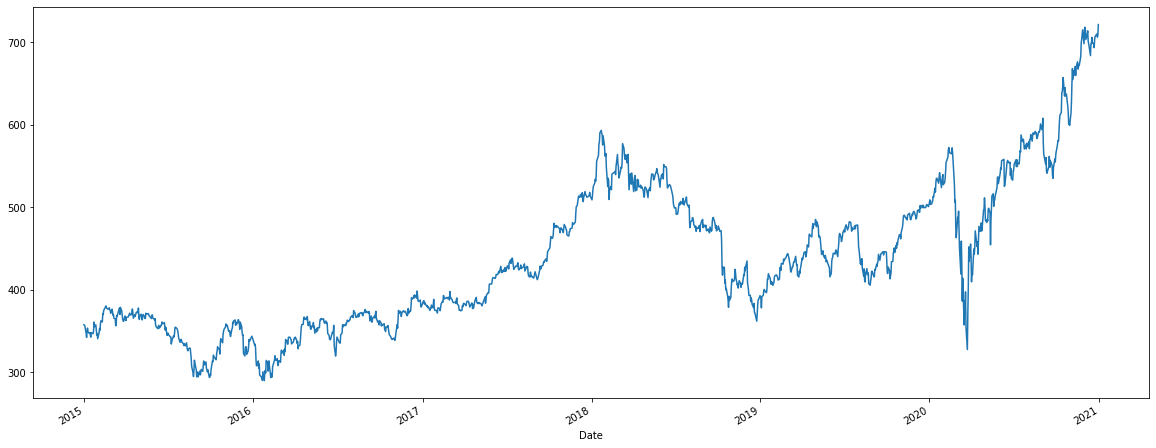

In [92]:
# Non stationary time series of BlackRock stock prices
df["BLK"].plot(figsize=(20,8))
plt.show()

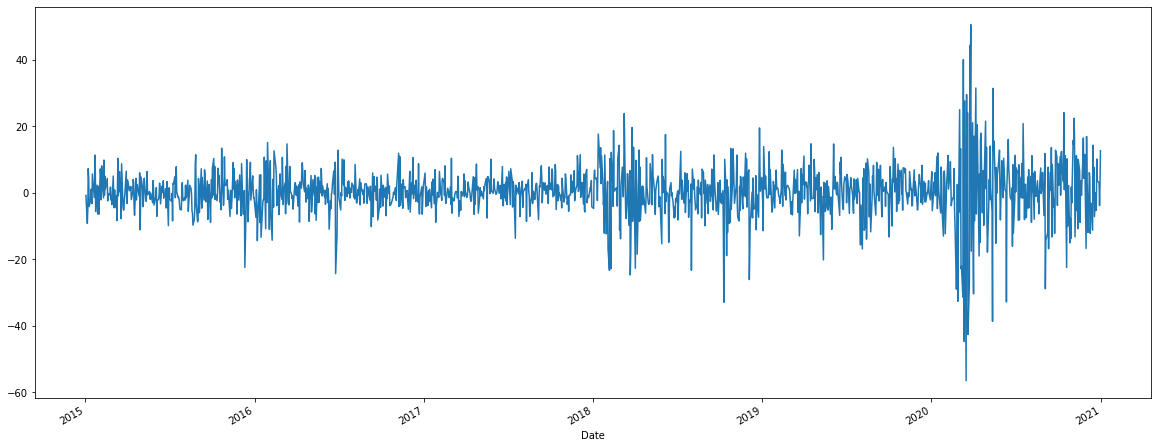

In [93]:
# After applying diff, which creates price lags and subtracts it from current price. Series becomes stationary
df["BLK"].diff().plot(figsize=(20,8))
plt.show()

In [14]:
ret = df[["BLK","C"]].pct_change().dropna()
ret.head()

Symbols,BLK,C
Date,,
2015-01-02,-0.002321,0.002772
2015-01-05,-0.025874,-0.031515
2015-01-06,-0.015540,-0.035205
2015-01-07,0.021163,0.009270
2015-01-08,0.011679,0.015048


In [ ]:
corr = ret.corr()

In [ ]:
sns.heatmap(corr, annot = True)

In [ ]:
plt.scatter(ret["BLK"], ret["C"], edgecolor="black", alpha=0.5)
plt.show()

In [ ]:
plt.scatter(ret["PEP"], ret["SLB"], edgecolor="black", alpha=0.5)
plt.show()

In [ ]:
plt.subplot(121)
sns.regplot(data=ret, x="BLK", y="C")
plt.subplot(122)
sns.regplot(data=ret, x="PEP", y="SLB")

In [ ]:
g = sns.PairGrid(ret)
g.map(sns.scatterplot)

## Building simple linear regression model 

In [15]:
# Adding constant 1 to return df
ret = sm.add_constant(ret)

In [16]:
ret

,const,BLK,C
Date,,,
2015-01-02,1.0,-0.002321,0.002772
2015-01-05,1.0,-0.025874,-0.031515
2015-01-06,1.0,-0.015540,-0.035205
2015-01-07,1.0,0.021163,0.009270
2015-01-08,1.0,0.011679,0.015048
...,...,...,...
2020-12-24,1.0,0.005031,-0.003455
2020-12-28,1.0,0.004242,0.009246
2020-12-29,1.0,-0.005492,-0.003599


In [17]:
results = sm.OLS(ret["C"], ret[["const", "BLK"]]).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      C   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     1517.
Date:                Fri, 20 May 2022   Prob (F-statistic):          2.86e-230
Time:                        16:44:04   Log-Likelihood:                 4116.5
No. Observations:                1511   AIC:                            -8229.
Df Residuals:                    1509   BIC:                            -8218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.535      0.5

In [21]:
intercept, coef = results.params

C = intercept + coef * BLK

corr = sqrt(R^2)

In [23]:
results.rsquared**0.5

0.7080537468305496

In [27]:
ret.head(10)

,const,BLK,C
Date,,,
2015-01-02,1.0,-0.002321,0.002772
2015-01-05,1.0,-0.025874,-0.031515
2015-01-06,1.0,-0.015540,-0.035205
2015-01-07,1.0,0.021163,0.009270
2015-01-08,1.0,0.011679,0.015048
2015-01-09,1.0,-0.011856,-0.022333
2015-01-12,1.0,-0.006586,-0.007877
2015-01-13,1.0,0.003027,-0.007146
2015-01-14,1.0,-0.006408,-0.019392


## Exploring returns of Citi and BlackRock

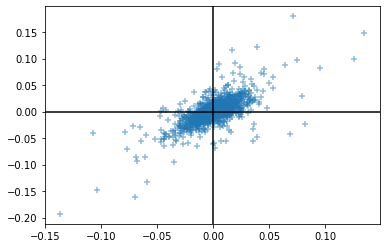

In [76]:
plt.scatter(ret["BLK"], ret["C"], marker="+", alpha=0.5)
plt.axhline(y=0,color="black")
plt.axvline(x=0,color="black")
plt.show()

From above plot, we observe that BlackRock and Citi stock prices is strongly positively correlated.

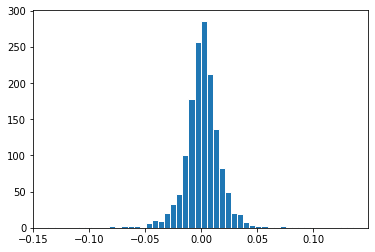

In [81]:
plt.hist(ret["BLK"], edgecolor="w", bins=50)
plt.show()

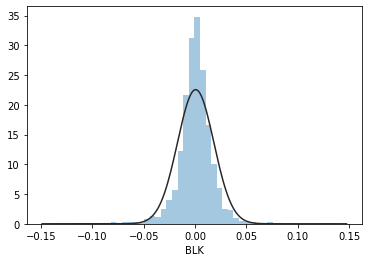

In [86]:
sns.distplot(ret["BLK"], fit=norm, kde= False)
plt.show()

From above plot, we can see stock returns of BlackRock does not follow normal distribution

In [41]:
resample_df = df["C"].asfreq("M").dropna()

In [42]:
resample_df = resample_df.pct_change().dropna()

In [43]:
resample_df.head(3)

Date
2015-03-31   -0.047865
2015-04-30    0.034938
2015-06-30    0.036009
Name: C, dtype: float64

In [46]:
print("Autocorrelation of citi:", resample_df.autocorr())

Autocorrelation of citi: -0.21964539194874583


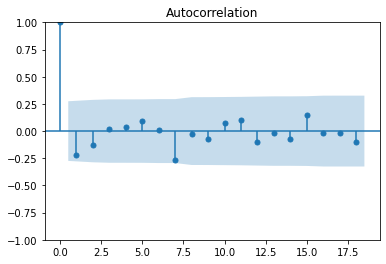

In [52]:
plot_acf(resample_df);

No autocorrelation with lags means stock returns are close to white noise

In [50]:
acf(resample_df)

array([ 1.        , -0.21735356, -0.13025682,  0.02006506,  0.03411922,
        0.08977567,  0.01356729, -0.26812237, -0.02879903, -0.07311598,
        0.07339332,  0.10305496, -0.09684483, -0.01326604, -0.07167511,
        0.14779381, -0.02200562, -0.01507896])

## White Noise

In [53]:
noise = np.random.normal(loc=0, scale=1, size=1000)

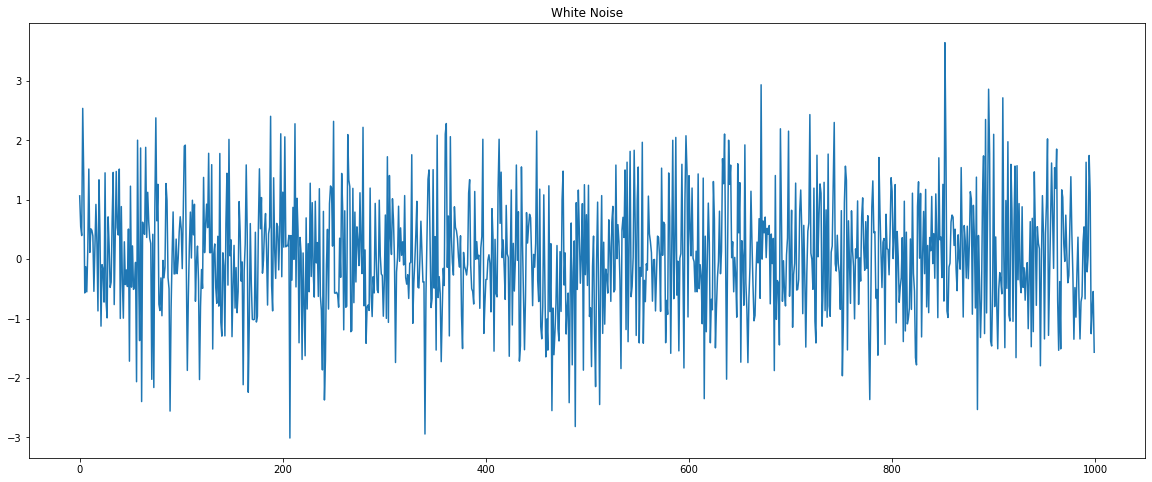

In [60]:
plt.figure(figsize=(20,8))
plt.plot(noise)
plt.title("White Noise")
plt.show()

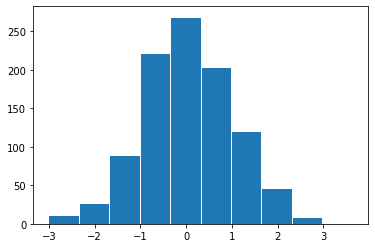

In [63]:
plt.hist(noise, edgecolor="w")
plt.show()

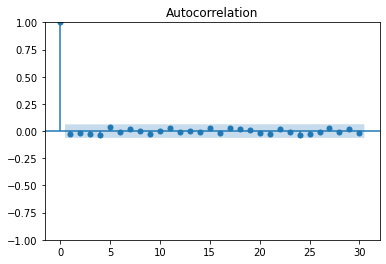

In [64]:
plot_acf(noise);

## Random walk

In [134]:
# Created random no between 0 and 2 of size 500
random_no = np.random.randint(0, 2, size=500)

In [135]:
# Using np.where to get steps between -1 and 1
steps = np.where(random_no, 1,-1)

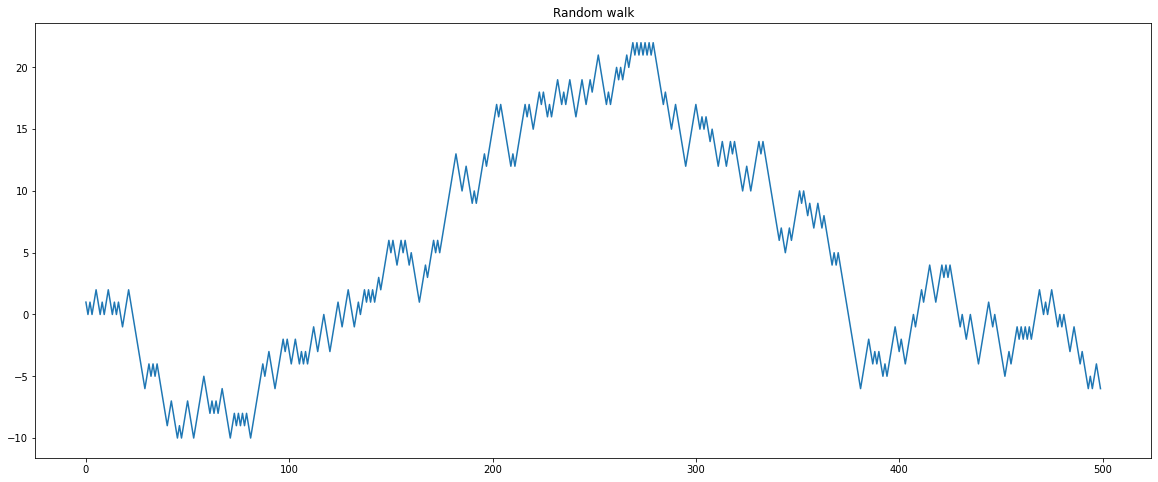

In [136]:
# Plotting the random walk
plt.figure(figsize = (20,8))
plt.plot(steps.cumsum())
plt.title("Random walk")
plt.show()

## Simulating AutoRegressive(AR) Model

In [229]:
ar = np.array([1, -0.9])

In [230]:
ma = np.array([1])

In [231]:
AR_object = ArmaProcess(ar, ma)

In [232]:
simulated_data = AR_object.generate_sample(nsample=1000)

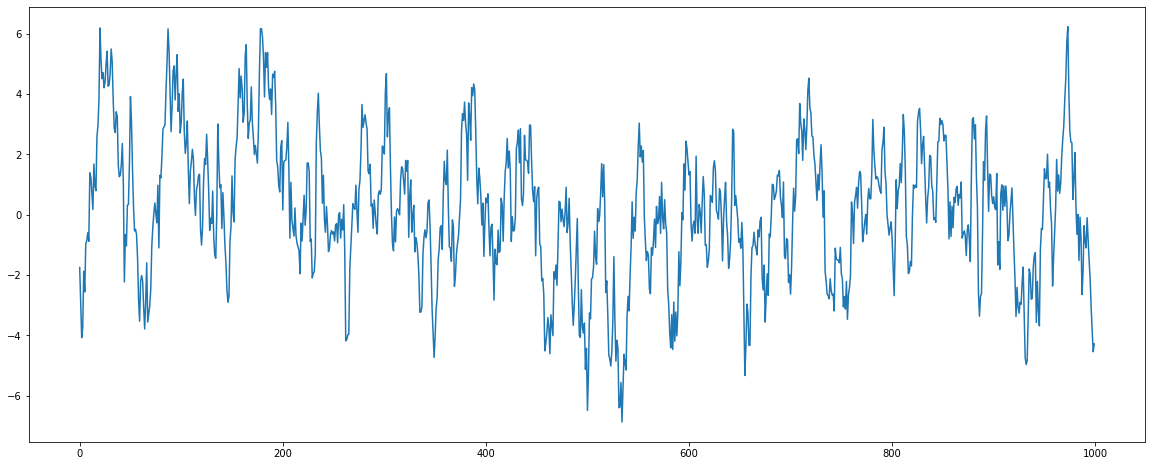

In [233]:
plt.figure(figsize = (20,8))
plt.plot(simulated_data)
plt.show()

In [234]:
AR_object.isstationary

True

### Estimating and forecasting AR Model

In [235]:
type(simulated_data)

numpy.ndarray

In [236]:
mod = AutoReg(simulated_data, 1)

In [237]:
res = mod.fit()

In [238]:
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(1)   Log Likelihood               -1416.663
Method:               Conditional MLE   S.D. of innovations              0.999
Date:                Sat, 21 May 2022   AIC                           2839.327
Time:                        01:04:27   BIC                           2854.047
Sample:                             1   HQIC                          2844.922
                                 1000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.032      0.418      0.676      -0.049       0.075
y.L1           0.9026      0.014     65.746      0.000       0.876       0.930
                                    Roots           

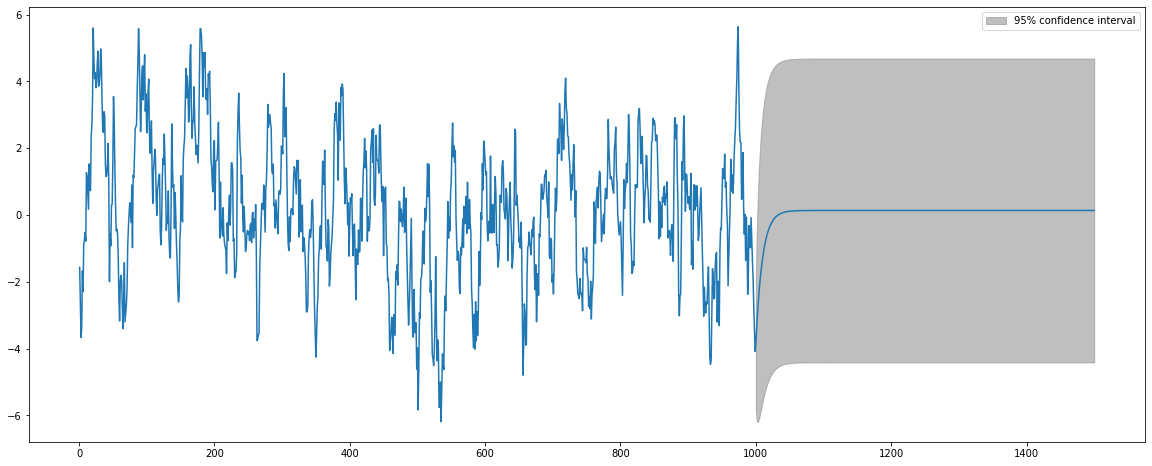

In [239]:
res.plot_predict(start =0, end = 1500,figsize=(20,8));

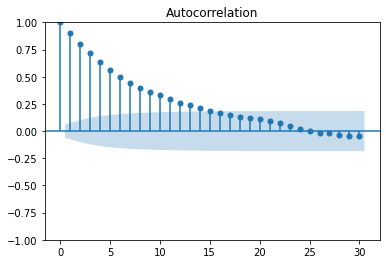

In [242]:
plot_acf(simulated_data);

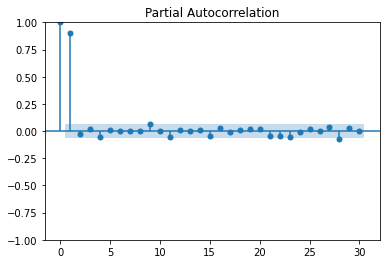

In [243]:
plot_pacf(simulated_data);

We observe that only lag 1 is significantly zero. Therefore, AutoReg model of order 1 is best for the data. No need to check models of other orders.

In [244]:
print("Model AIC:", res.aic)
print("Model BIC:", res.bic)

Model AIC: 2839.3266708680894
Model BIC: 2854.046935204035


## Working on FRED UnEmployment data

In [256]:
unrate = pdr.get_data_fred("UNRATE", start="1948-01-01", end="2022-04-01")

In [257]:
unrate.head()

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [258]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 892 entries, 1948-01-01 to 2022-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  892 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


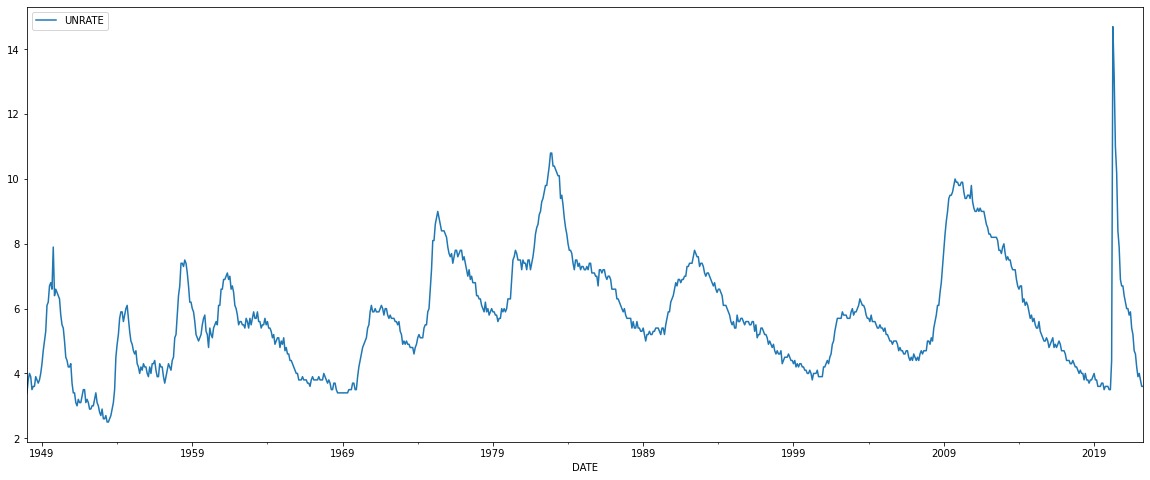

In [259]:
unrate.plot(figsize=(20,8))
plt.show()

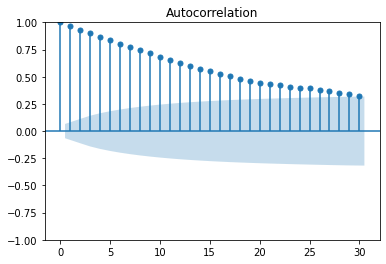

In [260]:
plot_acf(unrate);

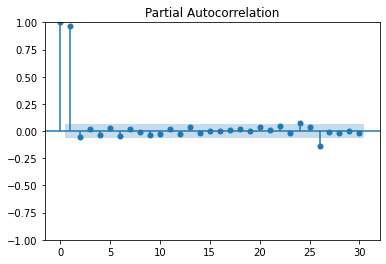

In [261]:
plot_pacf(unrate);

In [262]:
mod_unrate = AutoReg(unrate, 1)

In [264]:
res_unrate = mod_unrate.fit()

In [266]:
print(res_unrate.summary())

                            AutoReg Model Results                             
Dep. Variable:                 UNRATE   No. Observations:                  892
Model:                     AutoReg(1)   Log Likelihood                -485.570
Method:               Conditional MLE   S.D. of innovations              0.417
Date:                Sat, 21 May 2022   AIC                            977.140
Time:                        01:30:55   BIC                            991.517
Sample:                    02-01-1948   HQIC                           982.635
                         - 04-01-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1779      0.049      3.600      0.000       0.081       0.275
UNRATE.L1      0.9691      0.008    117.658      0.000       0.953       0.985
                                    Roots           

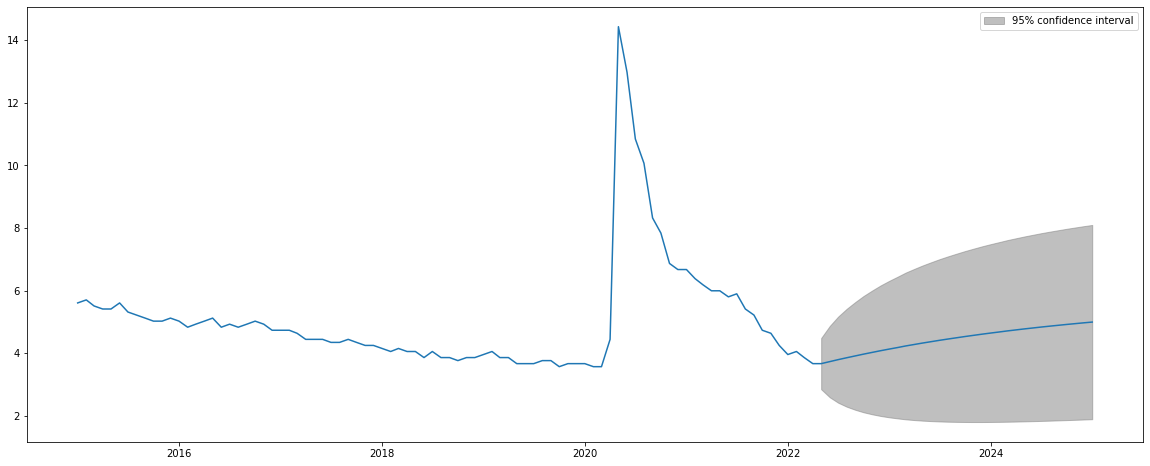

In [268]:
res_unrate.plot_predict(start = "2015", end = "2025",figsize=(20,8));

## Simulating moving average model